In [0]:
import re
import random
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite

import matplotlib.pyplot as plt
%matplotlib inline

#8A
Consider the contagion examples that we observed in chapter 5 of the notes. Given an undirected graph, a set of early adopters S, and a threshold q (such that a certain choice X will spread to a node if more than q fraction of its neighbors are playing it), produce an algorithm that permanently infects the set S of early adopters with X and then runs BRD on the remaining nodes to determine whether, and to what extent, the choice will cascade through the network. (Note: “BRD” in this case is simply the process of iteratively deciding whether there is a node that will switch its choice and performing this switch.)

In [0]:
def contagion_brd(G, S, q):
  if (S != -1):
    G = create_graph(G, random.sample(range(0, 4038), S))
  num_changed = 0
  flag = True
  prev = 0
  while (flag):
  
    for item in G.items():
      early_adopter_bool = item[1][0]

      if (not early_adopter_bool):
        neighbors = item[1][1]   
        if (len(neighbors) == 0):
          break

        count = 0
        for neighbor in neighbors:
          neighbor_bool = G[neighbor][0]

          if (neighbor_bool):
            count = count + 1

        fraction = count / len(neighbors)


        if (fraction > q):
          elem = item[0]

          if (G[elem][0] == False):
            num_changed = num_changed + 1
          G[elem][0] = True
          
    #check if we have converged yet and update the flag
    if (num_changed == prev):
      flag = False
    else:
      prev = num_changed
      
  return num_changed, G

In [0]:
# A -- B -- C -- D
test_case_1 = {
    'A': [True, ['B']],
    'B': [True, ['A', 'C']],
    'C': [False, ['B', 'D']],
    'D': [False, ['C']]
}


#     B    D    F
#     |    |    |
#A -- C -- E -- G
test_case_2 = {
    'A': [True, ['C']],
    'B': [True, ['C']],
    'C': [True, ['A', 'B', 'E']],
    'D': [False, ['E']],
    'E': [False, ['C', 'D', 'G']],
    'F': [False, ['G']],
    'G': [False, ['E', 'F']],
}

y = contagion_brd(test_case_2,-1, 0.34)
print(y)
yx = contagion_brd(test_case_2,-1, 0.3)
print(yx)
z = contagion_brd(test_case_1,-1, 0.55)
print(z)
z = contagion_brd(test_case_1,-1, 0.45)
print(z)

(0, {'A': [True, ['C']], 'B': [True, ['C']], 'C': [True, ['A', 'B', 'E']], 'D': [False, ['E']], 'E': [False, ['C', 'D', 'G']], 'F': [False, ['G']], 'G': [False, ['E', 'F']]})
(4, {'A': [True, ['C']], 'B': [True, ['C']], 'C': [True, ['A', 'B', 'E']], 'D': [True, ['E']], 'E': [True, ['C', 'D', 'G']], 'F': [True, ['G']], 'G': [True, ['E', 'F']]})
(0, {'A': [True, ['B']], 'B': [True, ['A', 'C']], 'C': [False, ['B', 'D']], 'D': [False, ['C']]})
(2, {'A': [True, ['B']], 'B': [True, ['A', 'C']], 'C': [True, ['B', 'D']], 'D': [True, ['C']]})


#8B
Run your algorithm several (100) times on a fairly small random set of early adopters (k = 10) with a low threshold (q = 0.1) on the Facebook data set. What happens? Is there a complete cascade? If not, how many nodes end up being “infected” on average?

In [0]:
def create_graph(fb_graph, S):
  new_graph = dict()
  
  for edge in fb_graph:  
    i = edge[0]
    j = edge[1]
    
    if (i not in new_graph.keys()):
      if (int(i) in S):
        new_graph[i] = [True, []]
      else:
        new_graph[i] = [False, []]
        
    if (j not in new_graph.keys()):
      if (int(j) in S):
        new_graph[j] = [True, []]
      else:
        new_graph[j] = [False, []]
        
    new_graph[i][1] = new_graph[i][1] + [j]
    new_graph[j][1] = new_graph[j][1] + [i]
  
  return new_graph

In [0]:
data_path = 'facebook_combined.txt'

with open(data_path) as f:
  raw_data = f.read()
  z = [s.strip().split(' ') for s in raw_data.splitlines()]

num_influenced = list()
for i in range(0, 100):
  influenced, res_graph = contagion_brd(z, 10, 0.1)
  num_influenced = num_influenced + [influenced + 10]

FileNotFoundError: ignored

In [0]:
print ("average with q=.1 after 100 iterations is: ", sum(num_influenced)/len(num_influenced))
for i, val in enumerate(num_influenced):
  print(val, end=' ')
  if (not i % 20): 
    print('')

#8C
Run your algorithm several (10) times with different values of q (try increments of 0.05 from 0 to 0.5), and with different values of k (try increments of 10 from 0 to 250). Observe and record the rates of “infection” under various conditions. What conditions on k and q are likely to produce a complete cascade in this particular graph, given your observations?

In [0]:
diff_k_list = list(np.arange(0, 260, 10))

for diff_q in np.arange(0, 0.55, 0.05):
  print("Plots for q: {}".format(diff_q))
  num_influenced_list = []
  
  for diff_k in np.arange(0, 260, 10):
    influenced = contagion_brd(z, diff_k, diff_q)[0]
    num_influenced_list = num_influenced_list + [diff_k + influenced]
  
  plt.plot(diff_k_list, num_influenced_list)
  plt.xlabel("Number of Early Adopters")
  plt.ylabel("Number influenced")
  plt.show()

#Bonus Question 2. (Optional, extra credit awarded depending on quality of solution.) 

Design an algorithm that, given a graph and a threshold q, finds (an approximation of) the smallest possible set of early adopters that will cause a complete cascade. Try running it on the Facebook data with different values of q and seeing how large a set we need.

#9a
First, implement an algorithm that, given a directed graph, a source s, a sink t, and edge capacities over each edge in E, computes the maximum flow from s to t (you must implement this algorithm yourself). Turn in your code and verify that your algorithm works on a few simple test cases. In particular, test your algorithm on the graphs in Figures 6.1 and 6.3 from the lecture notes and submit the output.

In [0]:
#Implementation courtesy of the link below
#https://medium.com/100-days-of-algorithms/day-49-ford-fulkerson-e70045dafd8b
def ford_fulkerson(graph, source, sink, debug=None):
    flow, path = 0, True
    
    while path:
        path, reserve = depth_first_search(graph, source, sink)
        flow += reserve

        for v, u in zip(path, path[1:]):
            if graph.has_edge(v, u):
                graph[v][u]['flow'] += reserve
            else:
                graph[u][v]['flow'] -= reserve
    return flow

In [0]:
#def max_flow(G, s, t, c):
def depth_first_search(graph, source, sink):
    undirected = graph.to_undirected()
    explored = {source}
    stack = [(source, 0, dict(undirected[source]))]
    
    while stack:
        v, _, neighbours = stack[-1]
        if v == sink:
            break
        
        while neighbours:
            u, e = neighbours.popitem()
            if u not in explored:
                break
        else:
            stack.pop()
            continue
        
        in_direction = graph.has_edge(v, u)
        capacity = e['capacity']
        flow = e['flow']
        neighbours = dict(undirected[u])

        if in_direction and flow < capacity:
            stack.append((u, capacity - flow, neighbours))
            explored.add(u)
        elif not in_direction and flow:
            stack.append((u, flow, neighbours))
            explored.add(u)

    reserve = min((f for _, f, _ in stack[1:]), default=0)
    path = [v for v, _, _ in stack]
    
    return path, reserve

In [0]:
def flow_debug(graph, path, reserve, flow):
    print('flow increased by', reserve, 'at path', path, '; current flow', flow)

In [0]:
def draw_graph(layout, graph):
    plt.figure(figsize=(12, 4))
    plt.axis('off')

    nx.draw_networkx_nodes(graph, layout, node_color='steelblue', node_size=600)
    nx.draw_networkx_edges(graph, layout, edge_color='gray')
    nx.draw_networkx_labels(graph, layout, font_color='white')

    for u, v, e in graph.edges(data=True):
        label = '{}/{}'.format(e['flow'], e['capacity'])
        color = 'green' if e['flow'] < e['capacity'] else 'red'
        x = layout[u][0] * .6 + layout[v][0] * .4
        y = layout[u][1] * .6 + layout[v][1] * .4
        t = plt.text(x, y, label, size=16, color=color, 
                     horizontalalignment='center', verticalalignment='center')
        
    plt.show()

In [0]:
graph = nx.DiGraph()
graph.add_nodes_from('ABCDEFGH')
graph.add_edges_from([
    ('A', 'B', {'capacity': 4, 'flow': 0}),
    ('A', 'C', {'capacity': 5, 'flow': 0}),
    ('A', 'D', {'capacity': 7, 'flow': 0}),
    ('B', 'E', {'capacity': 7, 'flow': 0}),
    ('C', 'E', {'capacity': 6, 'flow': 0}),
    ('C', 'F', {'capacity': 4, 'flow': 0}),
    ('C', 'G', {'capacity': 1, 'flow': 0}),
    ('D', 'F', {'capacity': 8, 'flow': 0}),
    ('D', 'G', {'capacity': 1, 'flow': 0}),
    ('E', 'H', {'capacity': 7, 'flow': 0}),
    ('F', 'H', {'capacity': 6, 'flow': 0}),
    ('G', 'H', {'capacity': 4, 'flow': 0}),
])

layout = {
    'A': [0, 1], 'B': [1, 2], 'C': [1, 1], 'D': [1, 0],
    'E': [2, 2], 'F': [2, 1], 'G': [2, 0], 'H': [3, 1],
}

Original Graph


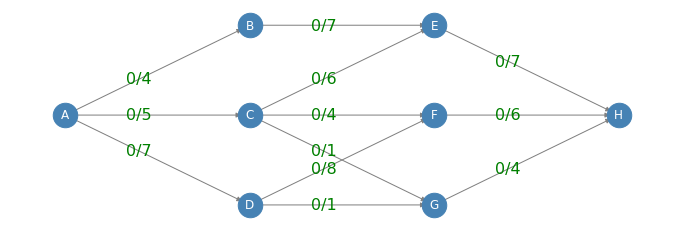

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('C', 'E'), ('C', 'F'), ('C', 'G'), ('D', 'F'), ('D', 'G'), ('E', 'H'), ('F', 'H'), ('G', 'H')]
Max Flow Graph


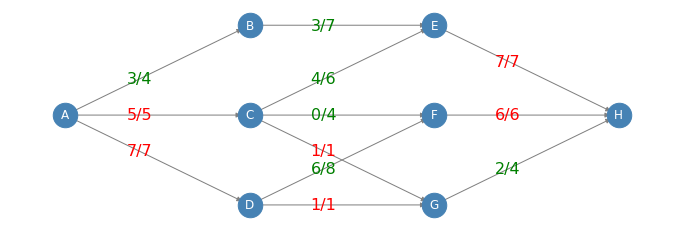

Max Flow 15


In [0]:
print("Original Graph")
draw_graph(layout, graph)

print (graph.edges)

max_test_graph = ford_fulkerson(graph, 'A', 'H', flow_debug)
print("Max Flow Graph")
draw_graph(layout, graph)
print("Max Flow", max_test_graph)

In [0]:
graph_61 = nx.DiGraph()
graph_61.add_nodes_from('SABT')
graph_61.add_edges_from([
    ('S', 'A', {'capacity': 1, 'flow': 0}),
    ('S', 'B', {'capacity': 3, 'flow': 0}),
    ('A', 'B', {'capacity': 2, 'flow': 0}),
    ('A', 'T', {'capacity': 1, 'flow': 0}),
    ('B', 'T', {'capacity': 1, 'flow': 0})
])

layout2 = {
    'S': [0, 1], 'A': [1, 2], 'B': [1, 0], 'T': [2, 1]
}

Original Graph


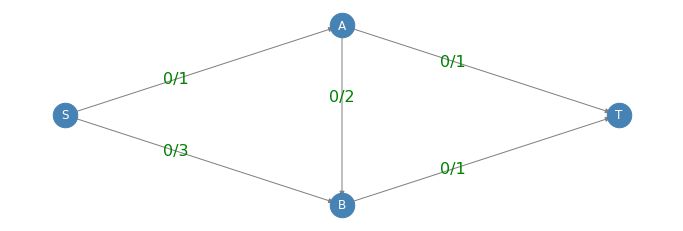

Max Flow Graph


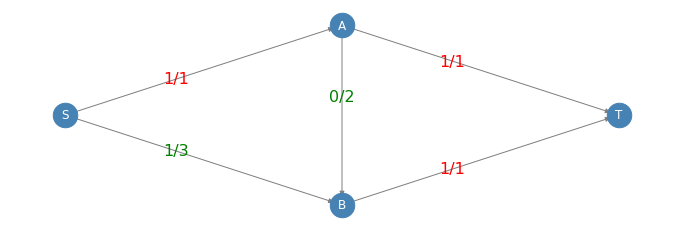

Max Flow 2


In [0]:
print("Original Graph")
draw_graph(layout2, graph_61)

max_flow_61 = ford_fulkerson(graph_61, 'S', 'T', flow_debug)
print("Max Flow Graph")
draw_graph(layout2, graph_61)
print("Max Flow", max_flow_61)

In [0]:
graph_63 = nx.DiGraph()
graph_63.add_nodes_from('SABCDEFGHIJT')
graph_63.add_edges_from([
    ('S', 'A', {'capacity': 1, 'flow': 0}),
    ('S', 'B', {'capacity': 1, 'flow': 0}),
    ('S', 'C', {'capacity': 1, 'flow': 0}),
    ('S', 'D', {'capacity': 1, 'flow': 0}),
    ('S', 'E', {'capacity': 1, 'flow': 0}),
    ('F', 'T', {'capacity': 1, 'flow': 0}),
    ('G', 'T', {'capacity': 1, 'flow': 0}),
    ('H', 'T', {'capacity': 1, 'flow': 0}),
    ('I', 'T', {'capacity': 1, 'flow': 0}),
    ('J', 'T', {'capacity': 1, 'flow': 0}),
    ('A', 'G', {'capacity': 1, 'flow': 0}),
    ('B', 'F', {'capacity': 1, 'flow': 0}),
    ('B', 'G', {'capacity': 1, 'flow': 0}),
    ('C', 'F', {'capacity': 1, 'flow': 0}),
    ('D', 'H', {'capacity': 1, 'flow': 0}),
    ('D', 'J', {'capacity': 1, 'flow': 0}),
    ('E', 'H', {'capacity': 1, 'flow': 0}),
    ('E', 'I', {'capacity': 1, 'flow': 0}),
])

layout3 = {
    'S': [0, 10], 
    'A': [1, 20], 'B': [1, 15], 'C': [1, 10], 'D': [1, 5], 'E': [1, 0], 
    'F': [2, 20], 'G': [2, 15], 'H': [2, 10], 'I': [2, 5], 'J': [2, 0], 
    'T': [3, 10]
}

In [0]:
print("Original Graph")
draw_graph(layout3, graph_63)

max_flow_63 = ford_fulkerson(graph_63, 'S', 'T', flow_debug)
print("Max Flow Graph")
draw_graph(layout3, graph_63)
print("Max Flow", max_flow_63)

#9b
Given a set of n drivers, m riders, and sets of possible riders that each driver can pick up,

i. explain how we can use this maximum-flow algorithm to determine the the maximum number of matches, and

ii. explain how we can additionally extend this to actually find the matchings.

i. We can use the maximum flow algorithm to determine the maximum number of matches by running max flow on a graph where there are edges between a source $S$ and all the drivers with a weight of 1, edges between the drivers and riders with a weight of 1, and edges between the riders and a sink $T$ with a weight of 1, and seeing how many edges between drivers and riders are saturated. The number of saturated edges is equivalent to the maximum number of matches.

ii. After running the max flow algorithm, we can trace/follow the backward edges in the residual graph from $T$ to $S$ to actually find the matchings.

#9c
Implement a maximal matching algorithm for Uber drivers and riders. Specifically, given n drivers with constraints specified on m riders, computed the assignments of drivers to riders. Test your algorithm on at least 2 examples (with at least 5 riders and drivers each). Explain your examples and your results.

In [0]:
#n = 7,
#m = 5
#https://stackoverflow.com/questions/35472402/how-do-display-bipartite-graphs-with-python-networkx-package
B = nx.Graph()
B.add_nodes_from('SABCDEabcdefgT')
B.add_edges_from([
    ('A', 'a', {'capacity': 1, 'flow': 0}),
    ('B', 'b', {'capacity': 1, 'flow': 0}),
    ('B', 'c', {'capacity': 1, 'flow': 0}),
    ('B', 'e', {'capacity': 1, 'flow': 0}),
    
    ('S', 'A', {'capacity': 1, 'flow': 0}),
    ('S', 'B', {'capacity': 1, 'flow': 0}),
    ('S', 'C', {'capacity': 1, 'flow': 0}),
    ('S', 'D', {'capacity': 1, 'flow': 0}),
    ('S', 'E', {'capacity': 1, 'flow': 0}),
    
    ('a', 'T', {'capacity': 1, 'flow': 0}),
    ('b', 'T', {'capacity': 1, 'flow': 0}),
    ('c', 'T', {'capacity': 1, 'flow': 0}),
    ('d', 'T', {'capacity': 1, 'flow': 0}),
    ('e', 'T', {'capacity': 1, 'flow': 0}),
    ('f', 'T', {'capacity': 1, 'flow': 0}),
    ('g', 'T', {'capacity': 1, 'flow': 0}),
    
    ('A', 'a', {'capacity': 1, 'flow': 0}),
    ('B', 'b', {'capacity': 1, 'flow': 0}),
    ('B', 'c', {'capacity': 1, 'flow': 0}),
    ('B', 'e', {'capacity': 1, 'flow': 0}),
    ('C', 'c', {'capacity': 1, 'flow': 0}),
    ('D', 'd', {'capacity': 1, 'flow': 0}),
    ('D', 'b', {'capacity': 1, 'flow': 0}),
    ('D', 'c', {'capacity': 1, 'flow': 0}),
    ('D', 'e', {'capacity': 1, 'flow': 0}),
    ('E', 'e', {'capacity': 1, 'flow': 0}),
    ('A', 'f', {'capacity': 1, 'flow': 0}),
    ('B', 'g', {'capacity': 1, 'flow': 0}),
])

layout4 = {
    'S': [-1, 60], 'A': [1, 150], 'B': [1, 120], 'C': [1, 90], 'D': [1, 60], 'E': [1, 30],
    'a': [2, 210], 'b': [2, 180], 'c': [2, 150], 'd': [2, 120], 'e': [2, 90],
    'f': [2, 60], 'g': [2, 30], 'T': [3, 60]
}

In [0]:
print("Original Graph")
draw_graph(layout4, B)

max_flow_B = ford_fulkerson(B, 'S', 'T', flow_debug)
print("Max Flow Graph")
draw_graph(layout4, B)
print("Max Flow", max_flow_B)

In [0]:
#n = 6,
#m = 6

C = nx.Graph()
C.add_nodes_from('SABCDEFabcdefT')
C.add_edges_from([
    ('A', 'a', {'capacity': 1, 'flow': 0}),
    ('B', 'b', {'capacity': 1, 'flow': 0}),
    ('B', 'c', {'capacity': 1, 'flow': 0}),
    ('B', 'e', {'capacity': 1, 'flow': 0}),
    
    ('S', 'A', {'capacity': 1, 'flow': 0}),
    ('S', 'B', {'capacity': 1, 'flow': 0}),
    ('S', 'C', {'capacity': 1, 'flow': 0}),
    ('S', 'D', {'capacity': 1, 'flow': 0}),
    ('S', 'E', {'capacity': 1, 'flow': 0}),
    ('S', 'F', {'capacity': 1, 'flow': 0}),
    
    ('a', 'T', {'capacity': 1, 'flow': 0}),
    ('b', 'T', {'capacity': 1, 'flow': 0}),
    ('c', 'T', {'capacity': 1, 'flow': 0}),
    ('d', 'T', {'capacity': 1, 'flow': 0}),
    ('e', 'T', {'capacity': 1, 'flow': 0}),
    ('f', 'T', {'capacity': 1, 'flow': 0}),
    
    ('A', 'a', {'capacity': 1, 'flow': 0}),
    ('B', 'b', {'capacity': 1, 'flow': 0}),
    ('B', 'c', {'capacity': 1, 'flow': 0}),
    ('B', 'e', {'capacity': 1, 'flow': 0}),
    ('C', 'c', {'capacity': 1, 'flow': 0}),
    ('D', 'd', {'capacity': 1, 'flow': 0}),
    ('D', 'b', {'capacity': 1, 'flow': 0}),
    ('D', 'c', {'capacity': 1, 'flow': 0}),
    ('D', 'e', {'capacity': 1, 'flow': 0}),
    ('E', 'e', {'capacity': 1, 'flow': 0}),
    ('F', 'f', {'capacity': 1, 'flow': 0}),
    ('A', 'f', {'capacity': 1, 'flow': 0}),
])

layout5 = {
    'S': [-1, 60], 'A': [1, 150], 'B': [1, 120], 'C': [1, 90], 'D': [1, 60], 
    'E': [1, 30], 'F': [1, 0],
    'a': [2, 210], 'b': [2, 180], 'c': [2, 150], 'd': [2, 120], 'e': [2, 90], 
    'f': [2, 60], 'T': [3, 60]
}

In [0]:
print("Original Graph")
draw_graph(layout5, C)

max_flow_C = ford_fulkerson(C, 'S', 'T', flow_debug)
print("Max Flow Graph")
draw_graph(layout5, C)
print("Max Flow", max_flow_C)

#9d
Now consider the case where there are n drivers and n riders, and the drivers each driver is connected to each rider with probability p. Fix n = 1000 (or maybe 100 if that’s too much), and estimate the probability that all n riders will get matched for varying values of p. Plot your results.

In [0]:
diff_p_list = list(np.arange(0, 1.10, 0.10))
prob_all_riders_matched = list()

for p in np.arange(0, 1.10, 0.10):
  brg = bipartite.random_graph(100, 100, p)
  RB_top = set(n for n,d in brg.nodes(data=True) if d['bipartite']==0)
  RB_bottom = set(brg) - RB_top
  
  brg.add_nodes_from('ST'+str(RB_top)+str(RB_bottom))

  for (u, v) in brg.edges():
    brg.add_edges_from([(u, v, {'capacity': 1, 'flow': 0})])

  for elem in RB_top:
    brg.add_edges_from([('S', elem, {'capacity': 1, 'flow': 0})])

  for elem in RB_bottom:
    brg.add_edges_from([(elem, 'T', {'capacity': 1, 'flow': 0})])
    
  max_flow = ford_fulkerson(brg, 'S', 'T', flow_debug)
  prob_all_riders_matched = prob_all_riders_matched + [max_flow / 100]
  
plt.plot(diff_p_list, prob_all_riders_matched)
plt.xlabel("Probability")
plt.ylabel("Prob all riders matched")
plt.show()